### Site de venda de carros
Algoritimo para classificar se um carro vai ser vendido ou não.

In [1]:
!pip install graphviz

In [2]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
colunas_renomeadas = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}

valor_vendido_mapper = {
    'no': 0,
    'yes': 1
}

dados = dados.rename(columns=colunas_renomeadas)
dados.vendido = dados.vendido.map(valor_vendido_mapper)

dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [4]:
from datetime import datetime

ano_atual = datetime.today().year

dados['idade_modelo'] = ano_atual - dados.ano_modelo
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934

dados = dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_modelo'], axis=1)
dados.head()

,preco,vendido,idade_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [5]:
x = dados[['preco', 'idade_modelo', 'km_por_ano']]
y = dados['vendido']

print(x, y)

          preco  idade_modelo   km_por_ano
0      30941.02            23  35085.22134
1      40557.96            25  12622.05362
2      89627.50            17  11440.79806
3      95276.14             8  43167.32682
4     117384.68             9  12770.11290
...         ...           ...          ...
9995   97112.86            17  25060.64248
9996  107424.63            21  21317.31764
9997   93856.99             9  20950.38812
9998   51250.57            12  16840.13376
9999   87945.73            24  19894.66108

[10000 rows x 3 columns] 0       1
1       1
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    0
Name: vendido, Length: 10000, dtype: int64


### Classificação linear

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

import numpy as np

SEED = 5
TEST_SIZE_PERCENTAGE = 0.25

np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=TEST_SIZE_PERCENTAGE, stratify=y)

print(f'Treinaremos {len(treino_x)} elementos e testaremos com {len(teste_x)}')

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print('A taxa de acerto foi: %2.f%%' % acuracia)


Treinaremos 7500 elementos e testaremos com 2500
A taxa de acerto foi: 47%


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [7]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)

acuracia = dummy_stratified.score(teste_x, teste_y) * 100
print('A taxa de acerto do dummy stratified foi: %2.f%%' % acuracia)


A taxa de acerto do dummy stratified foi: 58%


### Classificação Não linear

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import numpy as np

SEED = 5
TEST_SIZE_PERCENTAGE = 0.25

treino_x_original, teste_x_original, treino_y, teste_y = train_test_split(x, y, test_size=TEST_SIZE_PERCENTAGE, stratify=y)
print(f'Treinaremos {len(treino_x)} elementos e testaremos com {len(teste_x)}')

escalador = StandardScaler()
escalador.fit(treino_x_original)

treino_x = escalador.transform(treino_x_original)
teste_x = escalador.transform(teste_x_original)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100

print('A taxa de acerto foi: %2.f%%' % acuracia)

Treinaremos 7500 elementos e testaremos com 2500
A taxa de acerto foi: 77%


### Classificação via arvore de decisão

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import numpy as np

SEED = 5
TEST_SIZE_PERCENTAGE = 0.25

treino_x_original, teste_x_original, treino_y, teste_y = train_test_split(x, y, test_size=TEST_SIZE_PERCENTAGE, stratify=y)
print(f'Treinaremos {len(treino_x_original)} elementos e testaremos com {len(teste_x_original)}')

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x_original, treino_y)

previsoes = modelo.predict(teste_x_original)
acuracia = accuracy_score(teste_y, previsoes) * 100

print('A taxa de acerto foi: %2.f%%' % acuracia)

Treinaremos 7500 elementos e testaremos com 2500
A taxa de acerto foi: 79%


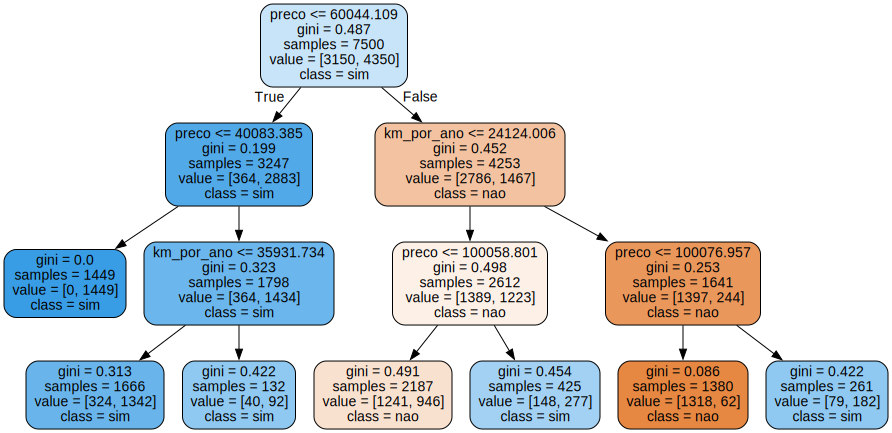

In [20]:
from sklearn.tree import export_graphviz
import graphviz

nomes_features = x.columns

dados_dot = export_graphviz(modelo, filled=True, rounded=True, feature_names=nomes_features, class_names=['nao', 'sim'])
grafico = graphviz.Source(dados_dot)

grafico
